# PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data_cancer = load_breast_cancer()

In [4]:
dir(data_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(data_cancer.data, columns = data_cancer.feature_names)

In [6]:
df['target'] = data_cancer.target

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_data = scaler.fit_transform(df)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(scaled_data)
x_pca

array([[ 9.22577011,  2.11619563],
       [ 2.6558016 , -3.78477586],
       [ 5.89249212, -1.00557896],
       ...,
       [ 1.53007727, -1.95887147],
       [10.40500789,  1.84907792],
       [-5.50486158, -0.76634841]])

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(x_pca,data_cancer.target)

LogisticRegression()

In [19]:
model.score(x_pca,data_cancer.target)

0.9736379613356766

In [20]:
model.fit(scaled_data,data_cancer.target)
model.score(scaled_data,data_cancer.target)

1.0

Text(0, 0.5, 'Second PC')

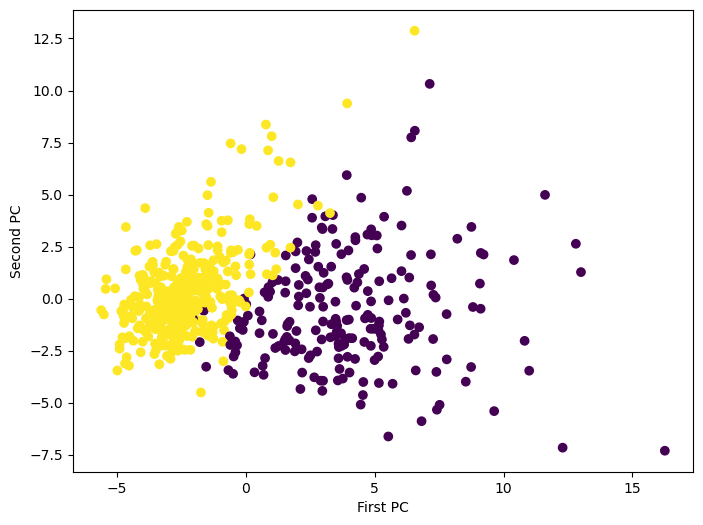

In [21]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c = data_cancer.target )
plt.xlabel('First PC')
plt.ylabel('Second PC')